In [60]:
import db_init
from pony.orm import * 
import pandas as pd

In [61]:
@db_session
def count_tweets_time():
    query = 'SELECT created_at FROM tweet ;'        
    tweets_time = pd.read_sql(query, db_init.db.get_connection(), parse_dates=['created_at'])
    return tweets_time

@db_session
def count_tweets_reply_time():
    query = 'SELECT created_at FROM tweet_reply ;'        
    tweets_time = pd.read_sql(query, db_init.db.get_connection(), parse_dates=['created_at'])
    return tweets_time
   

In [62]:
df = count_tweets_time()
df_reply = count_tweets_reply_time()

In [63]:
df["created_at_round"] = df["created_at"].dt.round('H') 
df_reply["created_at_round"] = df_reply["created_at"].dt.round('H') 
## round in minutes. to hour H

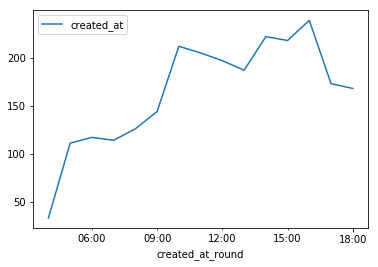

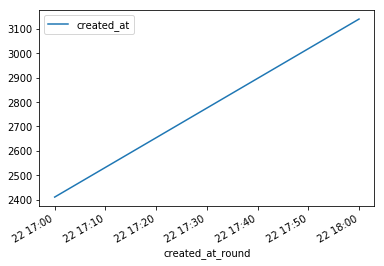

In [64]:
df.groupby(["created_at_round"]).count().plot()
df_reply.groupby(["created_at_round"]).count().plot()

In [65]:
df_reply.groupby(["created_at_round"]).count()

,created_at
created_at_round,
2018-12-22 17:00:00,2410
2018-12-22 18:00:00,3140
